In [391]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [392]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [393]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CC ML recr/CC ML Recruitment Task 1 Dataset/tour_logs_train.csv")
df.columns

Index(['Gig_ID', 'Venue_ID', 'Show_DateTime', 'Day_of_Week', 'Volume_Level',
       'Ticket_Price', 'Crowd_Size', 'Opener_Rating', 'Weather', 'Moon_Phase',
       'Band_Outfit', 'Merch_Sales_Post_Show', 'Crowd_Energy'],
      dtype='object')

In [394]:
df = df.drop("Merch_Sales_Post_Show", axis=1)
df

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Crowd_Energy
0,Gig_0000,V_Alpha,2024-03-07 21:00:00,3,5.0,52.93,464.0,2,Rainy,Waning Crescent,Leather,64.96
1,Gig_0001,V_Beta,2024-09-05 22:00:00,3,2.0,66.33,388.0,5,Clear,New Moon,Leather,66.42
2,Gig_0002,V_Delta,2024-03-09 15:00:00,5,1.0,51.37,679.0,1,Rainy,Waning Crescent,Denim,42.58
3,Gig_0003,V_Beta,08/07/2024 08:00 AM,0,10.0,64.77,454.0,1,Rainy,New Moon,Leather,0.00
4,Gig_0004,V_Delta,2024-04-26 17:00:00,4,8.0,47.34,654.0,5,Cloudy,Full Moon,Spandex,67.55
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Gig_1995,V_Alpha,2024-06-16 20:00:00,6,NaN,57.34,699.0,5,Stormy,First Quarter,Denim,40.67
1996,Gig_1996,V_Beta,05-23-2024 23:00,3,7.0,26.94,588.0,5,Stormy,Full Moon,Spandex,65.60
1997,Gig_1997,V_Beta,Late Night,4,2.0,57.54,649.0,1,Rainy,Waning Gibbous,Leather,60.34
1998,Gig_1998,V_Beta,"May 28, 2024",1,9.0,53.37,503.0,1,Rainy,Waning Gibbous,Leather,150.00


In [395]:
df["Ticket_Price"][6]

'£54.69'

In [ ]:
import re
def currency_sorter(t_price):
    if "Free" in t_price:
      return 0
    elif "VIP" in t_price:
      return float(re.search(r"\d+\.\d+",t_price).group())
    elif "$" in t_price:
      return float(t_price.replace("$",""))
    elif "USD" in t_price:
      return float(t_price.replace(" USD",""))
    elif "£" in t_price:
      return float(t_price.replace("£",""))*1.27
    elif "€" in t_price:
      return float(t_price.replace("€",""))*1.09
    else: return float(t_price)

In [397]:
df["Ticket_Price"] = df["Ticket_Price"].apply(currency_sorter)

In [398]:
df["Ticket_Price"] = df["Ticket_Price"].apply(lambda x: round(x,2))

In [399]:
df.drop(df[df['Ticket_Price'] > 200].index, inplace=True)
df.drop(df[df['Ticket_Price'] == 0].index, inplace=True) # t_p = 0 is irrelevant to the general public, so I just dropped it

In [400]:
df["Ticket_Price"]

,Ticket_Price
0,52.93
1,66.33
2,51.37
3,64.77
4,47.34
...,...
1995,57.34
1996,26.94
1997,57.54
1998,53.37


In [401]:
rubbish_dates = ["Late Night", "Evening", "Afternoon", "Morning"]

df = df[~df['Show_DateTime'].isin(rubbish_dates)].copy()
df['Show_DateTime'] = pd.to_datetime(df['Show_DateTime'], errors='coerce', format='mixed')

In [402]:
df["Show_DateTime"]

,Show_DateTime
0,2024-03-07 21:00:00
1,2024-09-05 22:00:00
2,2024-03-09 15:00:00
3,2024-08-07 08:00:00
4,2024-04-26 17:00:00
...,...
1994,2024-08-18 20:00:00
1995,2024-06-16 20:00:00
1996,2024-05-23 23:00:00
1998,2024-05-28 00:00:00


In [403]:
df["Show_Date"] = df["Show_DateTime"].dt.date
df["Show_Time"] = df["Show_DateTime"].dt.time
df['Hour'] = df['Show_DateTime'].dt.hour
df['Month'] = df['Show_DateTime'].dt.month

In [404]:
df.drop("Show_DateTime", axis=1, inplace=True)

In [405]:
med_hour = df["Hour"].median()
df.loc[df["Hour"]==0, "Hour"] = med_hour
med_hour

19.0

In [406]:
print(df["Crowd_Energy"].min())
print(df["Crowd_Energy"].max())
print(df["Volume_Level"].min())
print(df["Volume_Level"].max())
print(df["Crowd_Size"].min())
print(df["Crowd_Size"].max())

-10.0
999.0
-5.0
99.0
-100.0
50000.0


In [407]:
# Fixing Outliers in Crowd_Energy, Volume_Level, Crowd_Size

df["Crowd_Energy"] = df["Crowd_Energy"].clip(0,100)

# Volume = 0 and NaN is a sensor's glitch, unmeasurably high volume, I filled with max vol_level 11
df.loc[df["Volume_Level"] == 0, "Volume_Level"] = df["Volume_Level"].max()
df["Volume_Level"] = df["Volume_Level"].fillna(df["Volume_Level"].max())
# for negatives
df.loc[df["Volume_Level"] < 0, "Volume_Level"] = np.nan
df["Volume_Level"] = df["Volume_Level"].fillna(df["Volume_Level"].median())
df["Volume_Level"] = df["Volume_Level"].clip(1,11)

df.loc[df["Crowd_Size"] <= 0, "Crowd_Size"] = np.nan
df["Crowd_Size"] = df["Crowd_Size"].fillna(df["Crowd_Size"].median())
df.drop(df[df['Crowd_Size']>5000].index, inplace=True)

In [408]:
print(df["Crowd_Energy"].min())
print(df["Crowd_Energy"].max())
print(df["Volume_Level"].min())
print(df["Volume_Level"].max())
print(df["Crowd_Size"].min())
print(df["Crowd_Size"].max())

0.0
100.0
1.0
11.0
100.0
1200.0


# -EDA-

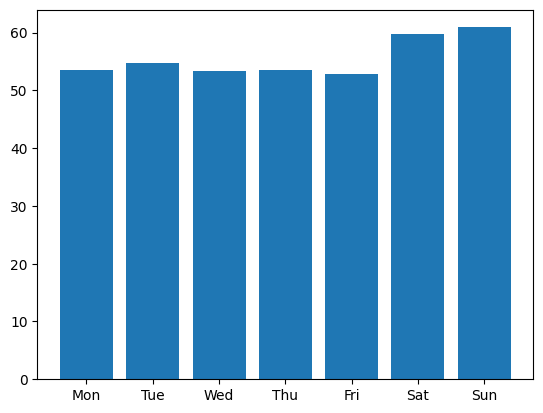

In [409]:
# 1. Tuesday shows are CURSED
med_by_day = df.groupby("Day_of_Week")["Crowd_Energy"].median()
plt.bar(x=med_by_day.index, height=df["Crowd_Energy"].groupby(df["Day_of_Week"]).median())

x_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.xticks(range(7), x_labels)
plt.show()

# Hence, the myth is busted, tuesdays are actually better than other working days.

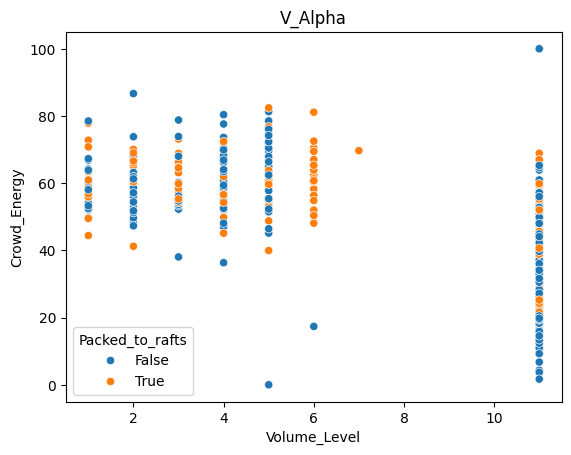

In [410]:
# 2. The energy dies when Brother Thomas Winces ... He's most probably a monk from Holy Grounds (V_Alpha)
v_alpha_df = df[df["Venue_ID"]=="V_Alpha"].copy()
v_alpha_df["Packed_to_rafts"] = v_alpha_df["Crowd_Size"]>600
sb.scatterplot(data=v_alpha_df, x="Volume_Level", y="Crowd_Energy", hue=v_alpha_df["Packed_to_rafts"])
plt.title("V_Alpha")
plt.show()

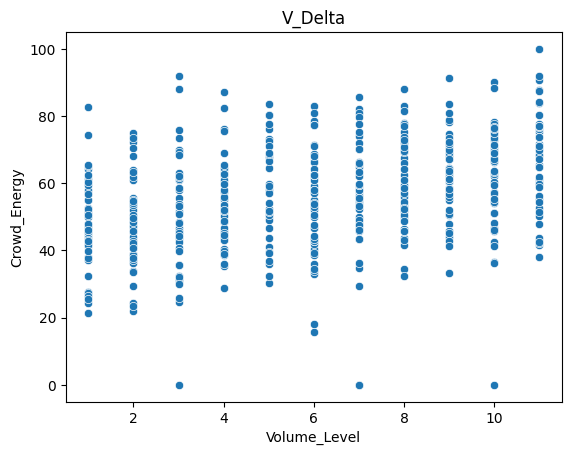

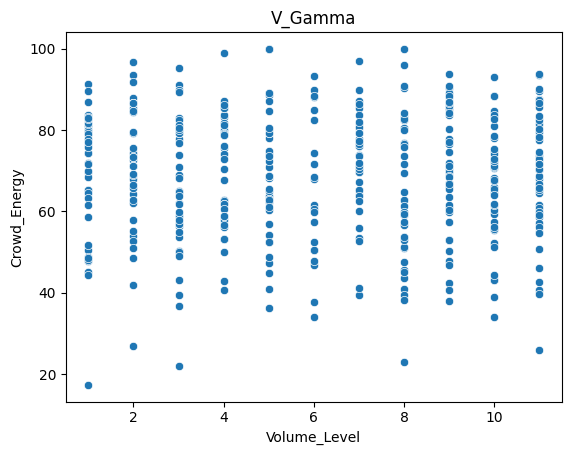

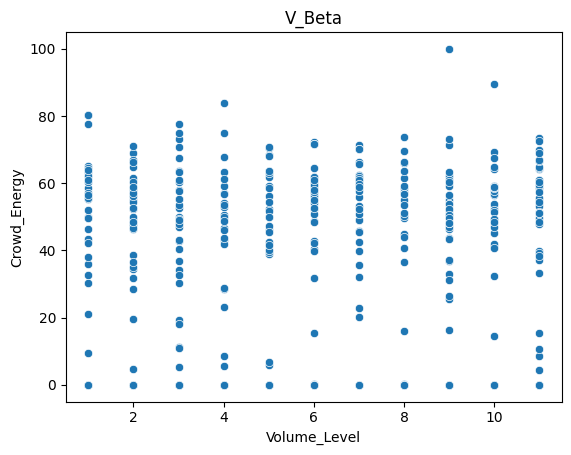

In [411]:
# For delta on the other hand
v_delta_df = df[df["Venue_ID"]=="V_Delta"].copy()
sb.scatterplot(data=v_delta_df, x="Volume_Level", y="Crowd_Energy")
plt.title("V_Delta")
plt.show()

v_gamma_df = df[df["Venue_ID"]=="V_Gamma"].copy()
sb.scatterplot(data=v_gamma_df, x="Volume_Level", y="Crowd_Energy")
plt.title("V_Gamma")
plt.show()

v_beta_df = df[df["Venue_ID"]=="V_Beta"].copy()
sb.scatterplot(data=v_beta_df, x="Volume_Level", y="Crowd_Energy")
plt.title("V_Beta")
plt.show()

In [412]:
# There is something wrong with the monastry no matter highly packed or not, in both the cases, the crowd
# energy levels aren't as high as they are in others.. feature needed

In [413]:
# 3. Goth and overall night shows energy

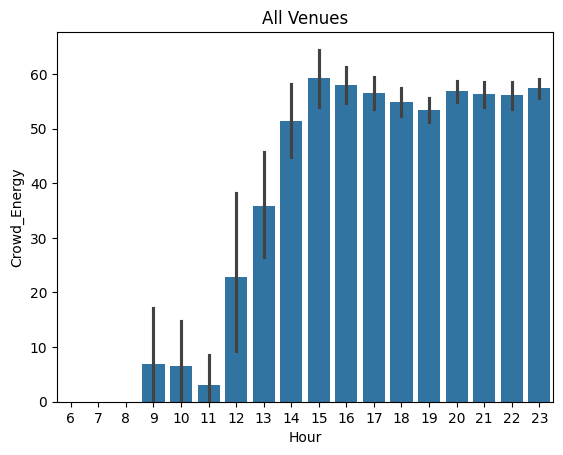

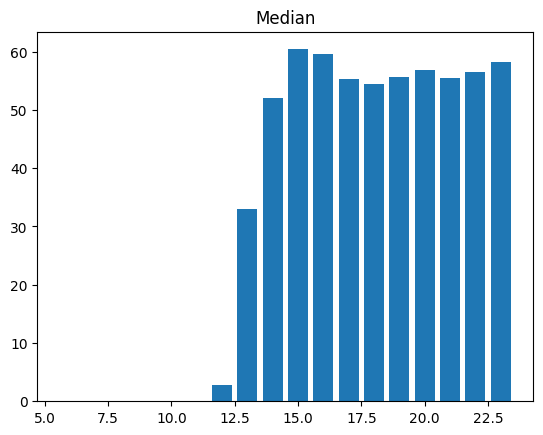

In [414]:
sb.barplot(data=df, x="Hour", y="Crowd_Energy")
plt.title("All Venues")
plt.show()

med_by_hour = df.groupby("Hour")["Crowd_Energy"].median()
plt.bar(x=med_by_hour.index, height=df["Crowd_Energy"].groupby(df["Hour"]).median())
plt.title("Median")
plt.show()

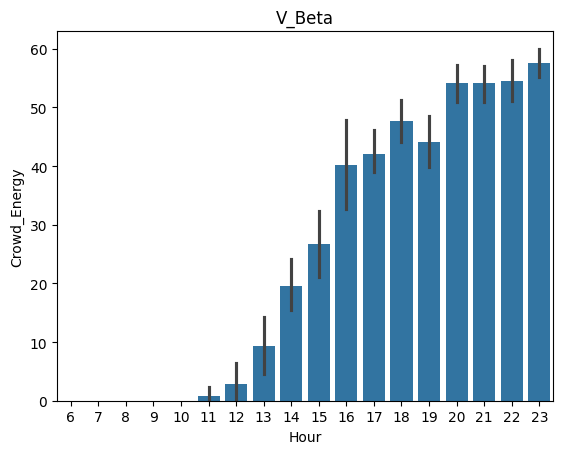

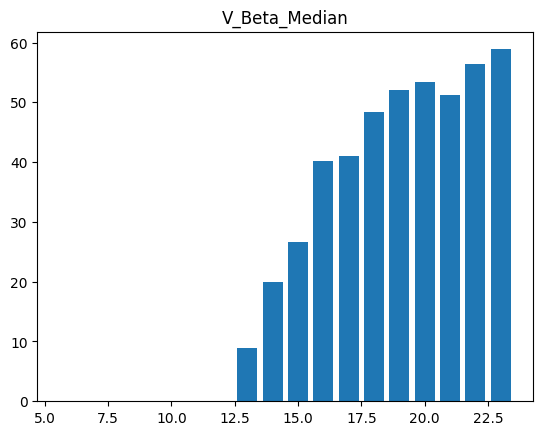

In [415]:
sb.barplot(data=v_beta_df, x="Hour", y="Crowd_Energy")
plt.title("V_Beta")
plt.show()

med_by_hour_beta = v_beta_df.groupby("Hour")["Crowd_Energy"].median()
plt.bar(x=med_by_hour_beta.index, height=v_beta_df["Crowd_Energy"].groupby(v_beta_df["Hour"]).median())
plt.title("V_Beta_Median")
plt.show()

4. Is Full Moon

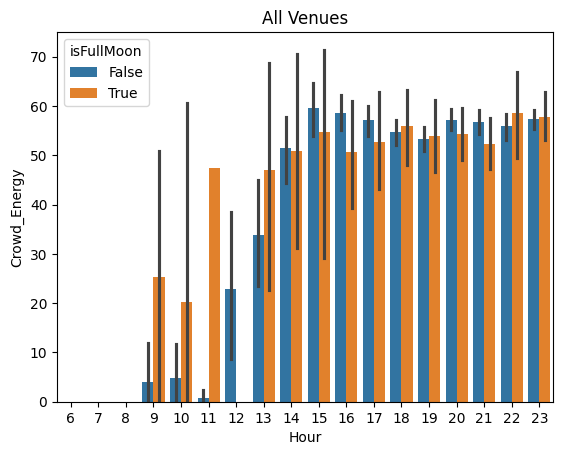

In [416]:
cdf = df.copy()
cdf["isFullMoon"] = cdf["Moon_Phase"]=="Full Moon"
sb.barplot(data=cdf, x="Hour", y="Crowd_Energy", hue="isFullMoon")
plt.title("All Venues")
plt.show()

5. Rainy in Mosh vs Rain Sucks

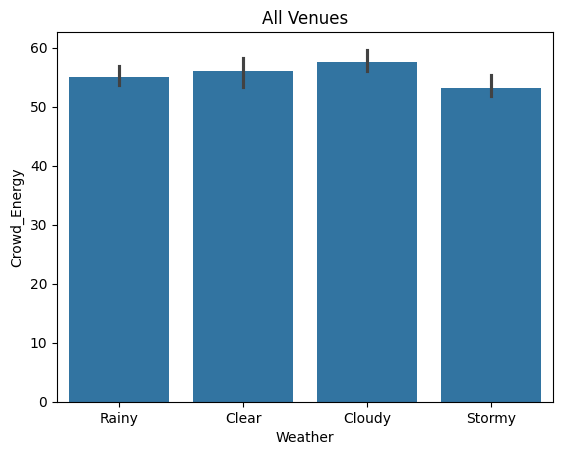

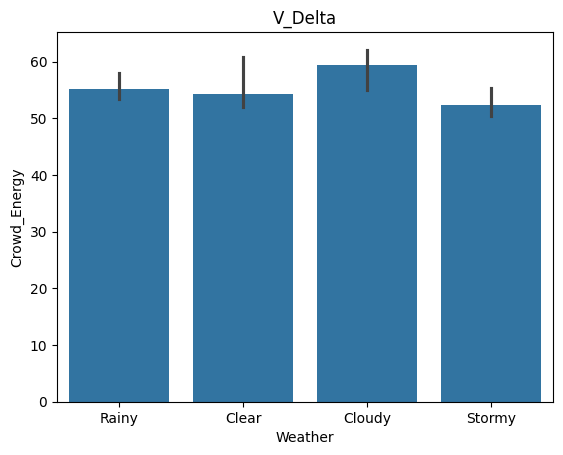

In [417]:
cdf = df.copy()
sb.barplot(data=cdf, x="Weather", y="Crowd_Energy",  estimator = np.median)
plt.title("All Venues")
plt.show()

v_delta_df = df[df["Venue_ID"]=="V_Delta"].copy()
sb.barplot(data=v_delta_df, x="Weather", y="Crowd_Energy", estimator = np.median, order = ["Rainy", "Clear", "Cloudy","Stormy"])
plt.title("V_Delta")
plt.show()

Band Outfit

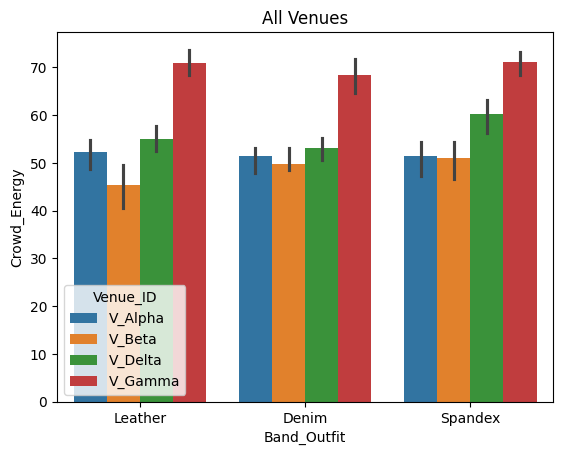

In [418]:
sb.barplot(data=df, x='Band_Outfit', y='Crowd_Energy', hue='Venue_ID', estimator=np.median)
plt.title("All Venues")
plt.show()

Price vs Energy

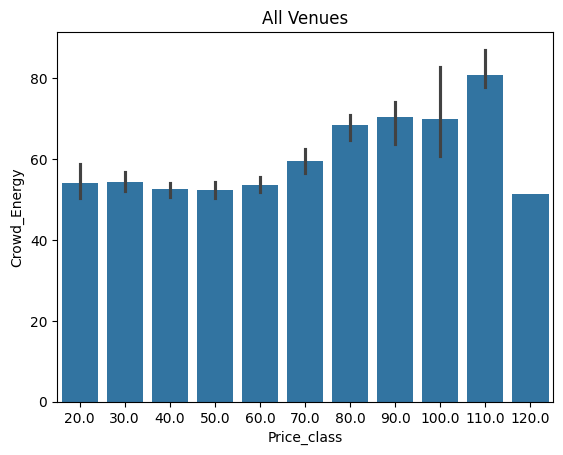

In [419]:
cdf = df.copy()
cdf["Price_class"] = cdf["Ticket_Price"].round(-1)
sb.barplot(data=cdf, x="Price_class", y="Crowd_Energy", estimator=np.median)
plt.title("All Venues")
plt.show()

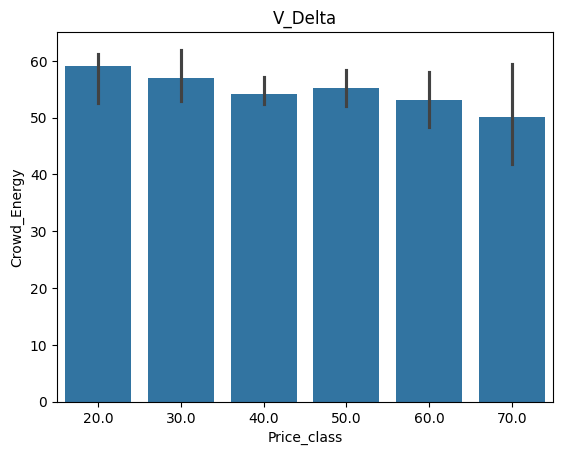

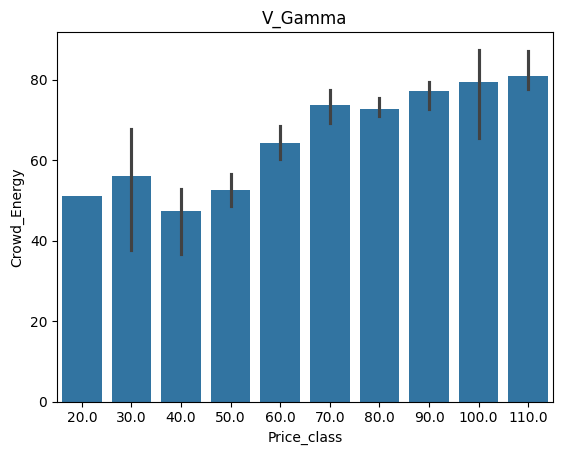

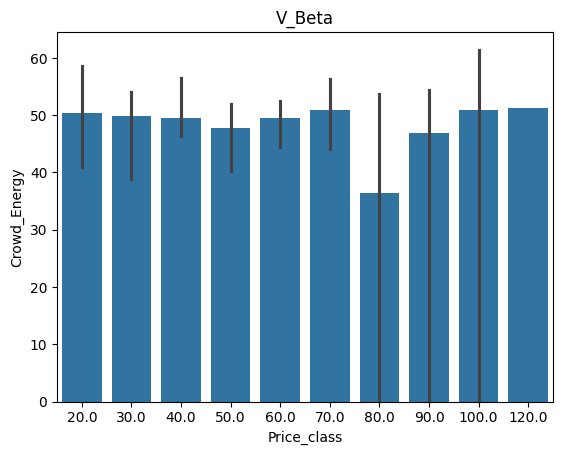

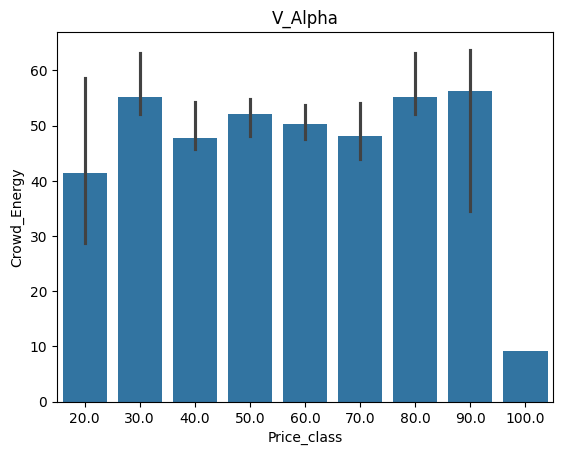

In [420]:
v_delta_df["Price_class"] = v_delta_df["Ticket_Price"].round(-1)
sb.barplot(data=v_delta_df, x="Price_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Delta")
plt.show()

v_gamma_df["Price_class"] = v_gamma_df["Ticket_Price"].round(-1)
sb.barplot(data=v_gamma_df, x="Price_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Gamma")
plt.show()

v_beta_df["Price_class"] = v_beta_df["Ticket_Price"].round(-1)
sb.barplot(data=v_beta_df, x="Price_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Beta")
plt.show()

v_alpha_df["Price_class"] = v_alpha_df["Ticket_Price"].round(-1)
sb.barplot(data=v_alpha_df, x="Price_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Alpha")
plt.show()

Crowd vs Energy

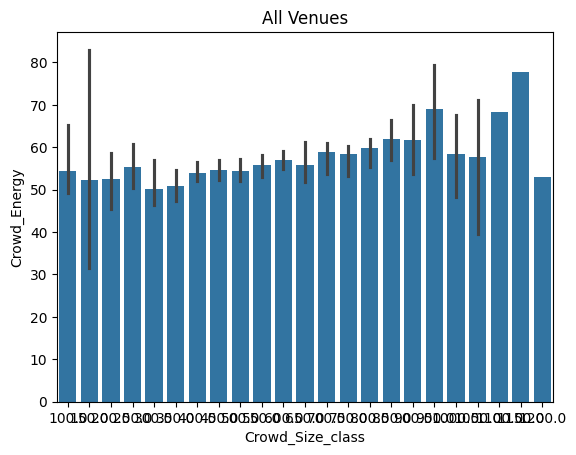

In [421]:
cdf = df.copy()
cdf["Crowd_Size_class"] = (2*cdf["Crowd_Size"]).round(-2)/2
sb.barplot(data=cdf, x="Crowd_Size_class", y="Crowd_Energy", estimator=np.median)
plt.title("All Venues")
plt.show()

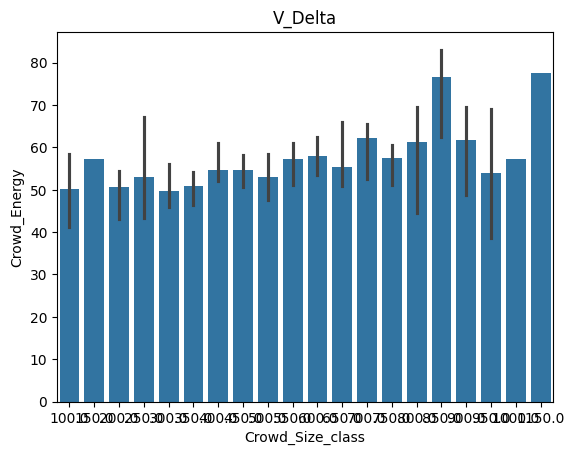

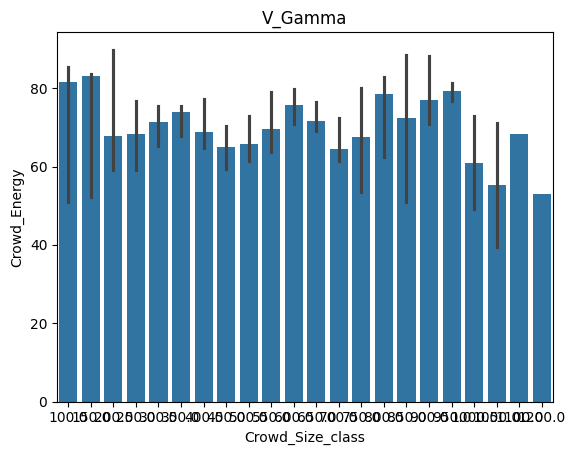

In [422]:
v_delta_df["Crowd_Size_class"] = ((2*v_delta_df["Crowd_Size"]).round(-2))/2
sb.barplot(data=v_delta_df, x="Crowd_Size_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Delta")
plt.show()

v_gamma_df["Crowd_Size_class"] = (2*v_gamma_df["Crowd_Size"]).round(-2)/2
sb.barplot(data=v_gamma_df, x="Crowd_Size_class", y="Crowd_Energy", estimator=np.median)
plt.title("V_Gamma")
plt.show()

Opener Ratings

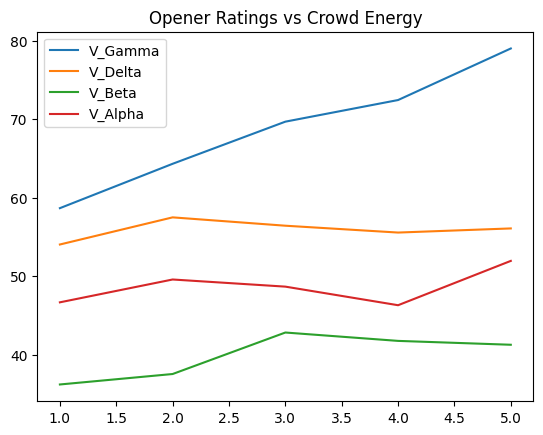

In [423]:
med_gamma_opener = df[df['Venue_ID'] == 'V_Gamma'].groupby('Opener_Rating')['Crowd_Energy'].mean()
med_delta_opener = df[df['Venue_ID'] == 'V_Delta'].groupby('Opener_Rating')['Crowd_Energy'].mean()
med_beta_opener = df[df['Venue_ID'] == 'V_Beta'].groupby('Opener_Rating')['Crowd_Energy'].mean()
med_alpha_opener = df[df['Venue_ID'] == 'V_Alpha'].groupby('Opener_Rating')['Crowd_Energy'].mean()

plt.plot(med_gamma_opener.index, med_gamma_opener.values, label='V_Gamma')
plt.plot(med_delta_opener.index, med_delta_opener.values, label='V_Delta')
plt.plot(med_beta_opener.index, med_beta_opener.values, label='V_Beta')
plt.plot(med_alpha_opener.index, med_alpha_opener.values, label='V_Alpha')
plt.legend()
plt.title("Opener Ratings vs Crowd Energy")
plt.show()

# -Feature Engineering-

In [424]:
# We just went ahead and introduced isWeekend cuz obviously weekends are better than normal days and we can now drop the Day_of_Week from final
df['isWeekend'] = ((df['Day_of_Week']==5) | (df['Day_of_Week']==6))

#Now comes the v_alpha noise problem, so I just set a penalty for that ie not that much of energy even on high volumes (Brother Thomas winces)
df['v_alpha_wincing'] = 0
df.loc[((df['Venue_ID'] == 'V_Alpha') & (df['Volume_Level'] > 9)), 'v_alpha_wincing'] = 1

# Now we know that only Gamma and Delta have graphs that show increase in crowd energy with increasing volume, while Beta remains almost unaffected
# So we are keeping volume only for Gamma and Delta (Already dealt with Alpha)
df['Volume_Gamma_Delta'] = 0
df.loc[df['Venue_ID'].isin(['V_Gamma', 'V_Delta']), 'Volume_Gamma_Delta'] = df['Volume_Level']

# Beta wake increasingly from hour 16 and peak at 22 and 23, which is a bit different than the overall venues, so we kept a separate feature
df['Betas_Wake'] = 0
df.loc[df['Venue_ID'] == 'V_Beta', 'Betas_Wake'] = df['Hour']

# Full moon influence but only during daytime shows...
df["is_FullMoon_Daytime"] = 0
df.loc[(df["Moon_Phase"]=="Full Moon") & (df["Hour"].between(9,13)), "is_FullMoon_Daytime"] = 1

# The special linear increase for the Snobs(Gamma) and special decrease for Mosh(Delta) in the crowd energy as the price increases is not a general
# trend hence, I decided to keep specific feats for both in order to make the model not neglect these special trends that exist
df['gamma_incr_with_price'] = 0
df.loc[df['Venue_ID'] == 'V_Gamma', 'gamma_incr_with_price'] = df['Ticket_Price']

df['delta_neg_with_price'] = 0
df.loc[df['Venue_ID'] == 'V_Delta', 'delta_neg_with_price'] = df['Ticket_Price']

# The opener rating's influence on the energy, it is only seen in the Snobs and other 3 venues don't seem to care at all and have similar
# crowd energies regardless of the ratings, so we'd keep it only for snobs and drop the column which is of no use for others
df['Snob_opener_ratings'] = 0
df.loc[(df['Venue_ID'] == 'V_Gamma'), 'Snob_opener_ratings'] = df['Opener_Rating']

# Also here I skipped any specific ones for crowd vs energy as those are really messy ones and we'd let the model take care of them by itself.
df['delta_crowd_score'] = 0
df.loc[df['Venue_ID'] == 'V_Delta', 'delta_crowd_score'] = (df['Crowd_Size']/1000)**2

## Creating final df, by dropping redundant columns and one hot encoding.
df.columns

/tmp/ipython-input-2033478155.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 69.46  48.05  56.79  79.31  48.4   79.39  73.21  49.33  70.96  60.55
  48.29  77.79  92.74  53.    50.1   54.2   84.58  60.63  66.8   54.91
  79.49 100.15  89.18  87.93  81.41  75.9   74.85  82.11  83.92  53.45
  79.94  74.63  94.    56.83  71.77  77.34  82.71  70.45  90.11  87.36
  57.91  67.    70.35  81.34  65.74  73.83  40.45  64.    85.79  82.17
  91.19  92.7   75.34  83.9   85.78  61.78  55.56  50.96  60.82  69.44
  52.33  67.41 106.    61.75  72.18  82.42  56.63  63.42  73.    85.06
  76.    52.24  88.    50.81  78.95  68.1   95.27  68.3   71.79  69.36
  60.84  46.85  81.69  75.28  87.68  79.57  90.2   86.36  52.2   76.5
  61.68  73.76  67.    65.    61.99  79.21  81.24  83.    77.19  59.1
  55.6   62.5  113.77  73.83  61.21  56.96  73.74  51.41  89.38  83.48
  82.    56.86  61.14  59.52  49.01  97.14  51.    78.4

Index(['Gig_ID', 'Venue_ID', 'Day_of_Week', 'Volume_Level', 'Ticket_Price',
       'Crowd_Size', 'Opener_Rating', 'Weather', 'Moon_Phase', 'Band_Outfit',
       'Crowd_Energy', 'Show_Date', 'Show_Time', 'Hour', 'Month', 'isWeekend',
       'v_alpha_wincing', 'Volume_Gamma_Delta', 'Betas_Wake',
       'is_FullMoon_Daytime', 'gamma_incr_with_price', 'delta_neg_with_price',
       'Snob_opener_ratings', 'delta_crowd_score'],
      dtype='object')

In [425]:
final_df = df.drop(columns = ['Gig_ID',
       'Show_Date', 'Show_Time'])
final_df.columns

Index(['Venue_ID', 'Day_of_Week', 'Volume_Level', 'Ticket_Price', 'Crowd_Size',
       'Opener_Rating', 'Weather', 'Moon_Phase', 'Band_Outfit', 'Crowd_Energy',
       'Hour', 'Month', 'isWeekend', 'v_alpha_wincing', 'Volume_Gamma_Delta',
       'Betas_Wake', 'is_FullMoon_Daytime', 'gamma_incr_with_price',
       'delta_neg_with_price', 'Snob_opener_ratings', 'delta_crowd_score'],
      dtype='object')

In [426]:
final_df = pd.get_dummies(final_df, columns=['Venue_ID', 'Weather', 'Band_Outfit', 'Moon_Phase'], drop_first=False)
final_df.columns

Index(['Day_of_Week', 'Volume_Level', 'Ticket_Price', 'Crowd_Size',
       'Opener_Rating', 'Crowd_Energy', 'Hour', 'Month', 'isWeekend',
       'v_alpha_wincing', 'Volume_Gamma_Delta', 'Betas_Wake',
       'is_FullMoon_Daytime', 'gamma_incr_with_price', 'delta_neg_with_price',
       'Snob_opener_ratings', 'delta_crowd_score', 'Venue_ID_V_Alpha',
       'Venue_ID_V_Beta', 'Venue_ID_V_Delta', 'Venue_ID_V_Gamma',
       'Weather_Clear', 'Weather_Cloudy', 'Weather_Rainy', 'Weather_Stormy',
       'Band_Outfit_Denim', 'Band_Outfit_Leather', 'Band_Outfit_Spandex',
       'Moon_Phase_First Quarter', 'Moon_Phase_Full Moon',
       'Moon_Phase_Last Quarter', 'Moon_Phase_New Moon',
       'Moon_Phase_Waning Crescent', 'Moon_Phase_Waning Gibbous',
       'Moon_Phase_Waxing Crescent', 'Moon_Phase_Waxing Gibbous'],
      dtype='object')

In [437]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
import time

# I am creating functions for all the above tasks I already did to preprocess all the data easily
def load_and_clean(filename):
    df = pd.read_csv(filename)
    def clean_price(price):
        if str(price) == 'nan' or "Free" in str(price) or "VIP" in str(price): return 0.0
        multiplier = 1.0
        if "£" in str(price): multiplier = 1.27
        elif "€" in str(price): multiplier = 1.09
        try:
            clean_val = re.sub(r'[^0-9.]','', str(price))
            if clean_val == '': return 0.0
            return float(clean_val) * multiplier
        except:
            return 0.0

    df['Price_Clean'] = df['Ticket_Price'].apply(clean_price)

    df['Show_DateTime'] = pd.to_datetime(df['Show_DateTime'], errors='coerce', format='mixed')
    df['Hour'] = df['Show_DateTime'].dt.hour

    df['Volume_Level'] = df['Volume_Level'].replace(0, 11).fillna(11).clip(upper=11)
    df['Crowd_Size'] = df['Crowd_Size'].fillna(df['Crowd_Size'].median())

    if 'Crowd_Energy' in df.columns:
        df['Crowd_Energy'] = df['Crowd_Energy'].clip(0, 100)

    return df

def engineer_features(df):
    # We just went ahead and introduced isWeekend cuz obviously weekends are better than normal days and we can now drop the Day_of_Week from final
    df['isWeekend'] = ((df['Day_of_Week']==5) | (df['Day_of_Week']==6)).astype(float)

    #Now comes the v_alpha noise problem, so I just set a penalty for that ie not that much of energy even on high volumes (Brother Thomas winces)
    df['v_alpha_wincing'] = 0.0
    df.loc[((df['Venue_ID'] == 'V_Alpha') & (df['Volume_Level'] > 9)), 'v_alpha_wincing'] = 1.0

    # Now we know that only Gamma and Delta have graphs that show increase in crowd energy with increasing volume, while Beta remains almost unaffected
    # So we are keeping volume only for Gamma and Delta (Already dealt with Alpha)
    df['Volume_Gamma_Delta'] = 0.0
    df.loc[df['Venue_ID'].isin(['V_Gamma', 'V_Delta']), 'Volume_Gamma_Delta'] = df['Volume_Level']

    # Beta wake increasingly from hour 16 and peak at 22 and 23, which is a bit different than the overall venues, so we kept a separate feature
    df['Betas_Wake'] = 0.0
    df.loc[df['Venue_ID'] == 'V_Beta', 'Betas_Wake'] = df['Hour']

    # Full moon influence but only during daytime shows...
    df["is_FullMoon_Daytime"] = 0.0
    df.loc[(df["Moon_Phase"]=="Full Moon") & (df["Hour"].between(9,13)), "is_FullMoon_Daytime"] = 1.0

    # The special linear increase for the Snobs(Gamma) and special decrease for Mosh(Delta) in the crowd energy as the price increases is not a general
    # trend hence, I decided to keep specific feats for both in order to make the model not neglect these special trends that exist
    df['gamma_incr_with_price'] = 0.0
    df.loc[df['Venue_ID'] == 'V_Gamma', 'gamma_incr_with_price'] = df['Price_Clean'] # Changed from Ticket_Price

    df['delta_neg_with_price'] = 0.0
    df.loc[df['Venue_ID'] == 'V_Delta', 'delta_neg_with_price'] = df['Price_Clean'] # Changed from Ticket_Price

    # The opener rating's influence on the energy, it is only seen in the Snobs and other 3 venues don't seem to care at all and have similar
    # crowd energies regardless of the ratings, so we'd keep it only for snobs and drop the column which is of no use for others
    df['Snob_opener_ratings'] = 0.0
    df.loc[(df['Venue_ID'] == 'V_Gamma'), 'Snob_opener_ratings'] = df['Opener_Rating']

    # Also here I skipped any specific ones for crowd vs energy as those are really messy ones and we'd let the model take care of them by itself.
    df['Delta_Crowd_Power'] = 0.0
    if 'Crowd_Size' in df.columns:
        crowd_norm = df['Crowd_Size'] / 1000
        df.loc[df['Venue_ID'] == 'V_Delta', 'Delta_Crowd_Power'] = crowd_norm ** 2

    categorical_cols = ['Venue_ID', 'Weather', 'Band_Outfit', 'Moon_Phase']
    df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=False) # drop_first=False gives model more context

    drop_cols = ['Gig_ID', 'Ticket_Price', 'Show_DateTime', 'Price_Clean'] # Added Gig_ID and Price_Clean
    df_final = df_final.drop(columns=[c for c in drop_cols if c in df_final.columns], errors='ignore')

    return df_final

train_df = load_and_clean('/content/drive/MyDrive/CC ML recr/CC ML Recruitment Task 1 Dataset/tour_logs_train.csv')
train_processed = engineer_features(train_df)

X_final = train_processed.drop('Crowd_Energy', axis=1)
y_final = train_processed['Crowd_Energy']

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=5,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_final, y_final)

print(f"🏆 NEW BEST RMSE: {-random_search.best_score_:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
🏆 NEW BEST RMSE: 7.1874


In [441]:
test_df = load_and_clean('/content/drive/MyDrive/CC ML recr/CC ML Recruitment Task 1 Dataset/tour_logs_test_input.csv')
test_processed = engineer_features(test_df)
X_test = test_processed.reindex(columns=X_final.columns, fill_value=0)
final_model = random_search.best_estimator_
predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    'Gig_ID': test_df['Gig_ID'],
    'Crowd_Energy': predictions
})
submission.to_csv('submission.csv', index=False)